In [25]:
#Importing Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import sys

from sklearn.datasets import fetch_openml

In [26]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [27]:
X_train = np.array(X[:-10000])
X_test = np.array(X[-10000:])

y_train = y[:-10000].astype(np.int)
y_test = y[-10000:].astype(np.int)

n_values = np.max(y_train)+1
y_train = np.eye(n_values)[y_train]
y_test = np.eye(n_values)[y_test]

In [34]:
class LogistricRegression:
  def __init__(self, learning_rate = 0.01, epoch=2000):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.w=[]
    self.b=0
  
  def initialize_weight(self, dim):
    w = np.random.normal(0,1,(dim,1))
    b = np.random.rand(1)
    return w,b
  
  def sigmoid(self, x):
    s = 1/(1+np.exp(-x))
    return s
  
  def hypothesis(self, w, X, b):
    y_hat = self.sigmoid(np.matmul(X,w)+b)
    y_hat = np.squeeze(y_hat)
    return y_hat
  
  def cost(self, y_hat, y, N):
    cost = -(1/N)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    cost = np.squeeze(cost)
    return cost
  
  def cal_gradient(self, w, y_hat, X, y):
    N=X.shape[1]
    delta_w=(1/N)*np.matmul(X.T,(y_hat-y))
    delta_b = (1/N)*np.sum(y_hat-y)
    grads ={"delta_w":delta_w,
            "delta_b":delta_b}
    return grads
  
  def gradient_position(self, w,b,X,y):
    N=X.shape[0];
    y_hat = self.hypothesis(w,X,b)
    cost = self.cost(y_hat, y, N)
    grads = self.cal_gradient(w, y_hat, X, y)
    return grads, cost
  
  def gradient_descent(self, w, b, X, y, print_cost = False):
    costs = []
    
    for i in range(self.epoch):
      grads, cost = self.gradient_position(w,b,X,y)
      
      delta_w = grads["delta_w"]
      delta_b = grads["delta_b"]
      
      delta_w = delta_w.reshape(-1,1)
      
      w=w-(self.learning_rate*delta_w)
      b=b-(self.learning_rate*delta_b)
      if i%100==0:
        costs.append(cost)
      
      if print_cost and i%100 == 0:
        print("Cost after iteration %i: %f" %(i, cost))
        
      params = {"w": w, "b": b}
      grads = {"delta_w": delta_w, "delta_b": delta_b}
      
    return params, costs
  
  def train_model(self, X_train, Y_train, X_test, Y_test, print_cost = False):
    dim = np.shape(X_train)[1]
    w, b = self.initialize_weight(dim)
    parameters, costs = self.gradient_descent(w, b, X_train, Y_train, print_cost = False)
    
    self.w = parameters["w"]
    self.b = parameters["b"]
    
    Y_prediction_test = self.predict(X_test)
    Y_prediction_train = self.predict(X_train)
    
    train_score = 100 - np.mean(np.abs(Y_prediction_train-Y_train))*100
    test_score = 100 - np.mean(np.abs(Y_prediction_test - Y_test))*100
    print("test accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test - Y_test))*100))
    result_dict = {"costs":costs,
                    "Y_prediction_test": Y_prediction_test,
                    "Y_prediction_train": Y_prediction_train,
                    "w":self.w,
                    "b":self.b,
                    "learning_rate": self.learning_rate,
                    "num_iterations": self.epoch,
                    "train accuracy": train_score,
                    "test accuracy": train_score
                  }
    return result_dict
  

In [36]:
mdl = LogistricRegression()
result_dict = mdl.train_model(X_train, y_train, X_test, y_test)

/var/folders/n8/19vjmv8j44g_86f11gm_qn940000gn/T/ipykernel_28210/3060058435.py:14: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
/var/folders/n8/19vjmv8j44g_86f11gm_qn940000gn/T/ipykernel_28210/3060058435.py:23: RuntimeWarning: divide by zero encountered in log
  cost = -(1/N)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))


ValueError: operands could not be broadcast together with shapes (60000,10) (60000,) 

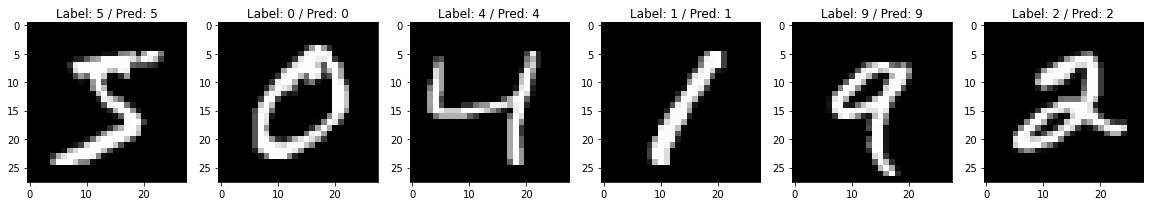

In [40]:
plt.figure(figsize=(20,5))
for index, (image,label) in enumerate(zip(X[:6], y[:6])):
    plt.subplot(1, 6, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Label: %s / Pred: %s" % (label, label))